In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer


In [5]:
df = pd.read_csv('divorce.csv', delimiter=';')
print(df.shape)
print(df['Class'].value_counts())
print(df.columns.values)
df.info()
df.describe()
df.head()
df.head(20)
df.tail()

(170, 55)
Class
0    86
1    84
Name: count, dtype: int64
['Atr1' 'Atr2' 'Atr3' 'Atr4' 'Atr5' 'Atr6' 'Atr7' 'Atr8' 'Atr9' 'Atr10'
 'Atr11' 'Atr12' 'Atr13' 'Atr14' 'Atr15' 'Atr16' 'Atr17' 'Atr18' 'Atr19'
 'Atr20' 'Atr21' 'Atr22' 'Atr23' 'Atr24' 'Atr25' 'Atr26' 'Atr27' 'Atr28'
 'Atr29' 'Atr30' 'Atr31' 'Atr32' 'Atr33' 'Atr34' 'Atr35' 'Atr36' 'Atr37'
 'Atr38' 'Atr39' 'Atr40' 'Atr41' 'Atr42' 'Atr43' 'Atr44' 'Atr45' 'Atr46'
 'Atr47' 'Atr48' 'Atr49' 'Atr50' 'Atr51' 'Atr52' 'Atr53' 'Atr54' 'Class']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   1

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0
169,0,0,0,0,0,0,0,1,0,0,...,3,4,4,0,1,3,3,3,1,0


       # NULL values
Atr1               0
Atr42              0
Atr31              0
Atr32              0
Atr33              0
Atr34              0
Atr35              0
Atr36              0
Atr37              0
Atr38              0
Atr39              0
Atr40              0
Atr41              0
Atr43              0
Atr29              0
Atr44              0
Atr45              0
Atr46              0
Atr47              0
Atr48              0
Atr49              0
Atr50              0
Atr51              0
Atr52              0
Atr53              0
Atr54              0
Atr30              0
Atr28              0
Atr2               0
Atr14              0
Atr3               0
Atr4               0
Atr5               0
Atr6               0
Atr7               0
Atr8               0
Atr9               0
Atr10              0
Atr11              0
Atr12              0
Atr13              0
Atr15              0
Atr27              0
Atr16              0
Atr17              0
Atr18              0
Atr19        

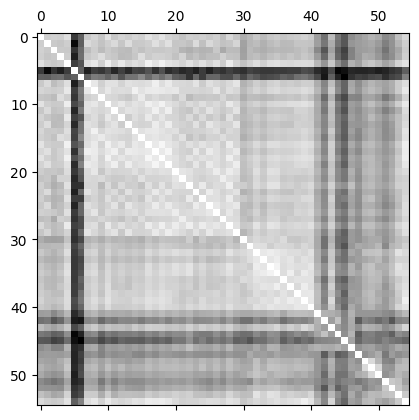

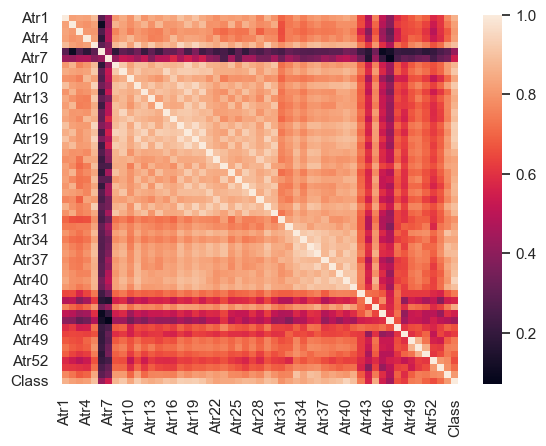

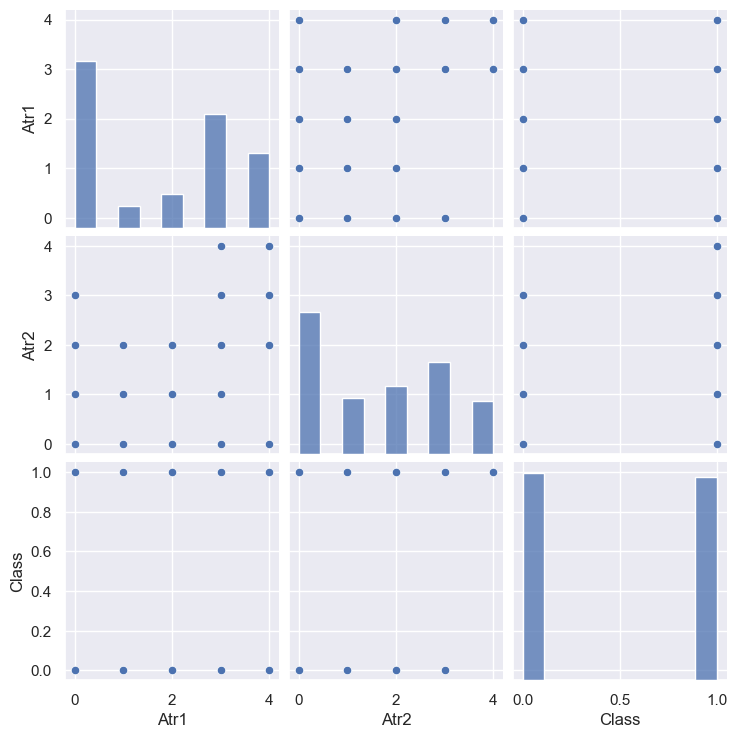

In [6]:


# Check for missing values
total = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['# NULL values'])
print(missing_data)

# Correlation matrix
corr = df.corr()
plt.matshow(corr, cmap='gray')
plt.show()
corr.style.background_gradient(cmap='coolwarm')

# Seaborn heatmap
sns.set()
ax = sns.heatmap(corr)

# Pairplot
sns.pairplot(df, vars=["Atr1", "Atr2", "Class"])


In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(170, 54)
(170,)
(102, 54) (102,) (68, 54) (68,)


In [8]:
dct = DecisionTreeClassifier(random_state=0, max_depth=4)
dct.fit(X_train, y_train)
print("Training Acc: ", accuracy_score(y_train, dct.predict(X_train)))
print("Testing Acc: ", accuracy_score(y_test, dct.predict(X_test)))


Training Acc:  1.0
Testing Acc:  0.9852941176470589


In [9]:
percept = Perceptron(random_state=0)
percept.fit(X_train, y_train)
print("Training Acc: ", accuracy_score(y_train, percept.predict(X_train)))
print("Testing Acc: ", accuracy_score(y_test, percept.predict(X_test)))


Training Acc:  1.0
Testing Acc:  0.9852941176470589


In [10]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
print("Training Acc: ", lr.score(X_train, y_train))
print("Testing Acc: ", accuracy_score(y_test, lr.predict(X_test)))


Training Acc:  1.0
Testing Acc:  1.0


In [11]:
scores = cross_val_score(lr, X, y, cv=5)
print(scores)

scores = cross_val_score(percept, X, y, cv=5)
print(scores)

scores = cross_val_score(dct, X, y, cv=5)
print(scores)


[0.88235294 1.         1.         1.         1.        ]
[0.88235294 1.         1.         1.         0.97058824]
[0.91176471 1.         1.         0.97058824 0.94117647]


In [12]:
print(percept.coef_)
print(percept.intercept_)
print(percept.n_iter_)

print(lr.coef_)
print(lr.intercept_)


[[  1.   3.   3.  -2.   6.  -1.   1.   5.   3.  -5.   5.  -1.  -3.   6.
    2.   5.   5.   7.   3.   8.   1.   2.   2.  -1.   0.   6.   3.   8.
    5.   7.   2.   0.   3.   3.   2.   7.   1.   2.   5.  12.  -2.   1.
   -7.   8.  -8.  -4.  -2. -13.   0.  -2.  -7.  -1.  -2.  -3.]]
[-8.]
11
[[ 2.53108516e-01  2.63381758e-01  3.34337552e-01  1.07354684e-01
   1.69152679e-01  3.08406393e-01 -4.05354024e-04  9.12288903e-02
   1.04925792e-01 -7.79129649e-02  1.18069954e-01  1.23750323e-01
  -9.05261126e-02  2.02464899e-01  2.83347911e-01  1.36857228e-01
   3.62365822e-01  2.78508006e-01  2.63170759e-01  2.89513026e-01
   9.73744678e-02 -2.48944382e-03 -4.37991820e-02 -8.24216708e-02
   1.53847839e-01  4.65434790e-01  1.09993801e-01  3.35841539e-01
   1.89803235e-01  2.21011919e-01  3.40679571e-01  1.95338332e-01
   1.80133400e-01  2.05059966e-01  9.06563736e-02  2.14979585e-01
   1.28560138e-02  1.98010551e-01  2.87477171e-01  5.58908901e-01
   1.92862943e-01  1.40312201e-01  1.37983455e-01  

In [13]:
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.support_vectors_)
print(clf.dual_coef_)
print(clf.intercept_)


[[ 0.0782001   0.06655932  0.10576772  0.04418116  0.06945626  0.08866125
   0.          0.01521097  0.01521097 -0.07300946  0.00601233  0.01528065
  -0.03778028  0.05991188  0.10396553  0.0565639   0.13194827  0.08245279
   0.09711847  0.0971813   0.03296205  0.         -0.01267527 -0.00894999
   0.05361907  0.16490252  0.02950781  0.11888894  0.06819159  0.07522131
   0.0940804   0.0958451   0.07660953  0.07578122  0.04569037  0.08541197
   0.0182998   0.07065164  0.0623404   0.16990002  0.05320074  0.0626336
   0.06148309  0.11035417 -0.01910417  0.01130951  0.04143617 -0.01257521
   0.17584568  0.06323046 -0.00324022  0.08248993  0.11494371 -0.03834624]]
[[0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 1. 1. 0. 0. 2. 1. 0. 0. 0. 0. 1. 1. 2. 1. 0. 2. 2. 2. 1. 0. 1. 3.
  2. 2. 2. 1. 0. 0.]
 [2. 2. 3. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 2. 1. 1.
  1. 1. 1. 1. 1.